# CPSC6300-001 Applied Data Science - HW7 ¶



# Part C. Preparing Data for Machine Learning (60 points)

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpt
import seaborn as sns

housing = pd.read_csv("datasets/housing.csv")

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 1. Creat a Test Dataset (12 points)

a. Use the __train_test_split()__ method in the library __sklearn.model_selection__ to split the __housing__ data into a __train_data__ and __test_data__. Set the test_size to 0.33 and random_state to 25.

In [4]:
### BEGIN SOLUTION

### END SOLUTION

b. Draw the distribution plots of the __median income__ for the housing data and test_data on the same plot. In the plots, set bins=20.

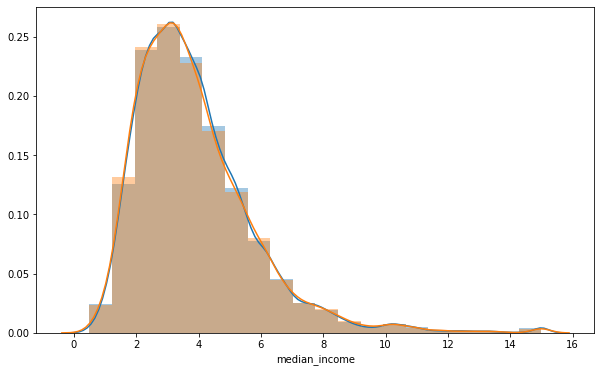

In [5]:
### BEGIN SOLUTION

### END SOLUTION

c. From the histograms you just plotted, you may reach two observations. First, the test data and the origial data have identical normilzed histograms. Second, the kernel density distribution of the median income is concentrated in the region of [1.5, 7] and has a long tail extending to infinity. 

If you want your machine learning algorithm works well across a wide range of median income, you may want to prepare the training and testing data such that each stratum of the median income has an adequate representation in the training and test datasets. The stratified sampling method serves this purpose.

Complete the following code to compare the performance of random sampling and and stratified sampling and save the results into a DataFrame as follows.
<img src="sampling_bias.jpg">

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

bins = [0., 1.5, 3.0, 4.5, 6.0, np.inf]
housing['income_level'] = pd.cut(housing.median_income, bins, labels=[1, 2, 3, 4, 5])
# note for this part some will come to certain errors, then please go to 
# https://github.com/ageron/handson-ml/issues/378
# to solve the issue
random_train_set, random_test_set = train_test_split(housing, test_size=0.33, random_state=25)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=25)
for train_index, test_index in split.split(housing, housing["income_level"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

### BEGIN SOLUTION

### END SOLUTION

sampling_bias['error.reduction.ratio'] = sampling_bias['rand.%error']/sampling_bias['stratified.%error']
sampling_bias
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_level", axis=1, inplace=True)

,overall,random,stratified,rand.%error,stratified.%error,error.reduction.ratio
1,0.039826,0.040370,0.039783,0.013668,-0.001076,-12.705179
2,0.318847,0.323840,0.318849,0.015661,0.000007,2279.441558
3,0.350581,0.347328,0.350558,-0.009279,-0.000067,138.101449
4,0.176308,0.173517,0.176307,-0.015829,-0.000009,1721.000000
5,0.114438,0.114944,0.114504,0.004424,0.000575,7.689715


## 2. Combine Attributes (6 points)

Before you prepare data for Machine Learning algorithms, you may try various attribute combinations to see if a combined attributes have a stronger relationship with the target variable.

a. First, create three combined attributions: __rooms_per_household__, __bedrooms_per_room__, and __population_per_household__. Then compute the correlation coefficients between all numerical attributes and __median_house_value__. Output these coefficients in a decreasing order. e.g.:
```
median_house_value          1.000000
median_income               0.688075
```

In [7]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
### BEGIN SOLUTION

### END SOLUTION

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

b. Among the three combined attributes, which ones are clearly more correlated to __median_house_value__ than the original attributes? Which ones are not? Write your answer to a block string such as
```
answer = """
attribue a is more correlated.
attribue b is not.
"""
```

In [8]:
### BEGIN SOLUTION
answer="""
"""
### END SOLUTION
print(answer)


rooms_per_household and bedrooms_per_room are more correlated to median_house_value than total_rooms and total_bed_rooms.

population_per_household is not more correlated to median_house_value than population.



## 3. Missing Values (10 points)

There are three options to handle attributes with missing values:

1. Remove the rows that contain missing features.
2. Remove the columns that contain missing fetaures.
3. Replace the missing values with new values such as the mean, the median, etc.

a. Which DataFrame methods can be used to accomplish the above goals? Write your answer to a block string such as
```
answer = """
1. method_a()
2. method_b()
3. method_c()
"""
```

In [1]:
### BEGIN SOLUTION
answer="""
"""
### END SOLUTION
print(answer)

b. Assume you choose the third option, you may want a systematic solution that handle the following two scenarios:

1. Both the train data and test data need to handle the missing values.
2. When your system is going online, attributes that currently do not contain missing values may have missing values.

You can use the SimputeImputer class in the scikit-leran library (https://scikit-learn.org/stable/modules/impute.html) to accomplish the goal of the third option. Complete the following code to replace all missing values in each column with the means of that column and save the cleaned data as a feature matrix __X__. 

Hint: you may drop the non-numerical attribute in this step.

In [10]:
### BEGIN SOLUTION

### END SOLUTION
housing_num = pd.DataFrame(X, columns=housing_num.columns)
X.shape,  np.isnan(X).any()

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

((20640, 13), False)

In [11]:
assert type(X).__name__ == "ndarray"

In [12]:
assert X.shape[0] == housing.shape[0]

In [13]:
assert np.isnan(X).any() == False

## 4. Handling Text and Categorical Attributes (10 points)

Categorical data is one type of structured data we frequently see in data science. For example, the position of a football player, the weather of a day, the size of a shirt, the genres of musics and country name are all categorical data.

In categorical data, the values of a data attribute are discrete and belong to a finite set of categories or classes, which are often known as classes or labels. The values of a categorical data can be numberic or textual.

There are two major classes of categorical data: nominal and ordinal. 

+ For nominal categorical attribute, there is no concept of ordering among the values of the attribute. For example, The types of weathers are normial data.

+ For ordinal categorical attribute, you can place the attributes into some kind of order or scale. For example, you can rate the happiness on a scale of 1-10. Similarly, shoe sizes, education level, income levels, and hurricane categories are examples of ordinal data.

a. Is __ocean_proximity__ a nominal categorical data or ordinal categorical data?

In [2]:
### BEGIN SOLUTION
answer = ""
### END SOLUTION
answer

''

b. Complete the following code to convert the __ocean_proximity__ categorical data into one-hot vectors (see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). Save the encoded results to a variable named __housing_cat_1hot__.

In [37]:
### BEGIN SOLUTION

### END SOLUTION
cat_encoder.categories_
housing_cat_1hot.shape

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

(13828, 5)

## 5. Feature Scaling (12 points)

With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. For the housing data, you may have already notices that the attributes have much different scales. For example , the total number of of rooms range from 6 to 39,320, while the median income range from 0 to 15.

There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

+ Min-max scaling (many people call this normalization) is quite simple: values are shifted and rescaled so that they end up ranging from 0 to 1.

+ Standardization is different: first, it subtracts the mean value (so standardized values always have a zero mean); then it divides the difference by the standard deviation so that the resulting distribution has unit variance.

a. Is scaling the target values generally required? Justify your answer.

b. Which feature scaling method is preffered when the original data contain a small number of outliers? Justify your answer.

c. Write some code to scale the housing data using standardization and save the transfromed data into a variable __housing_num_tr__.

In [39]:
### BEGIN SOLUTION

### END SOLUTION
df = pd.DataFrame(housing_num_tr)
df.describe()

StandardScaler(copy=True, with_mean=True, with_std=True)

,0,1,2,3,4,5,6,7
count,1.382800e+04,1.382800e+04,1.382800e+04,1.382800e+04,1.368500e+04,1.382800e+04,1.382800e+04,1.382800e+04
mean,8.267147e-15,-1.291425e-15,-2.631842e-17,-5.047609e-17,-1.435948e-17,7.867024e-17,-9.774667e-17,1.825268e-16
std,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000037e+00,1.000036e+00,1.000036e+00,1.000036e+00
min,-2.384346e+00,-1.445736e+00,-2.199447e+00,-1.221354e+00,-1.288678e+00,-1.309988e+00,-1.319276e+00,-1.770022e+00
25%,-1.110927e+00,-7.958795e-01,-8.463929e-01,-5.517767e-01,-5.797527e-01,-5.848398e-01,-5.808088e-01,-6.878249e-01
50%,5.420204e-01,-6.462722e-01,2.911292e-02,-2.402670e-01,-2.529261e-01,-2.384312e-01,-2.420137e-01,-1.740621e-01
75%,7.817227e-01,9.760320e-01,6.658444e-01,2.369245e-01,2.589421e-01,2.761010e-01,2.767664e-01,4.580021e-01
max,2.629428e+00,2.953654e+00,1.859716e+00,1.366423e+01,1.142151e+01,1.301008e+01,1.204460e+01,5.837887e+00


## Transformation Pipelines (10 points)

As you can see, there are many data transformation steps that need to be executed in the right order. To automate this process, you can create a pipeline using the Pipeline class in the scikit-learn library. Complete the following code to create a fully prepared data.

In [31]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import StratifiedShuffleSplit

# 1. Get the data
housing = pd.read_csv("datasets/housing.csv")

# 2. Split data into train set and test set
bins = [0., 1.5, 3.0, 4.5, 6.0, np.inf]
housing['income_level'] = pd.cut(housing.median_income, bins, labels=[1, 2, 3, 4, 5])
# note for this part some will come to certain errors, then please go to 
# https://github.com/ageron/handson-ml/issues/378
# to solve the issue
random_train_set, random_test_set = train_test_split(housing, test_size=0.33, random_state=56)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=56)
for train_index, test_index in split.split(housing, housing["income_level"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_level", axis=1, inplace=True)

# 3. Divide train data into fetaure matrix and labels and save them to variable housing and housing_labels
### BEGIN SOLUTION

### END SOLUTION

# 4. Create combined attributes
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self 
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# 5. create a numerical pipline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

# 6. Create a full pipeline
### BEGIN SOLUTION

### END SOLUTION

#7. Apply the pipeline to the train set and save the results to housing_prepared
### BEGIN SOLUTION

### END SOLUTION
housing_prepared.shape

(13828, 16)

In [32]:
df_train = pd.DataFrame(housing_prepared)
df_train.set_index(housing.index, inplace=True)
df_train["labels"] = housing_labels
df_train.to_csv("housing_train.csv", index=False)

df_train = pd.read_csv("housing_train.csv")
df_train.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,labels
0,1.221177,-1.338206,0.108704,-0.023151,0.274908,-0.300323,0.274120,-0.548471,-0.430742,-0.103751,0.613605,0.0,0.0,0.0,0.0,1.0,171700.0
1,0.132529,0.321500,1.222985,-0.278582,-0.550974,-0.583916,-0.432586,0.082032,0.232780,-0.061628,-0.999898,0.0,1.0,0.0,0.0,0.0,109000.0
2,0.746766,-0.851982,-0.607619,-0.670088,-0.616176,-0.781600,-0.623158,-0.292744,-0.347369,-0.074942,0.365385,1.0,0.0,0.0,0.0,0.0,237500.0


In [33]:
test_data = strat_test_set.drop("median_house_value", axis=1)
test_labels = strat_test_set["median_house_value"].copy()
test_data.shape
transformed_test_data = full_pipeline.fit_transform(test_data)
transformed_test_data.shape

df_test = pd.DataFrame(transformed_test_data)
df_test.set_index(strat_test_set.index, inplace=True)
df_test["label"] = test_labels
df_test.to_csv("housing_test.csv", index=False)

df_test = pd.read_csv("housing_test.csv")
df_test.head(3)

(6812, 9)

(6812, 16)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,label
0,1.081133,-0.718825,-0.764192,-0.734466,-0.761110,-0.699216,-0.689343,-0.774816,-0.530146,-0.376232,-0.043201,0.0,1.0,0.0,0.0,0.0,112500.0
1,1.210779,-1.357403,1.690681,-0.498984,-0.465692,-0.572127,-0.454240,-0.657075,-0.337051,-0.563437,0.101589,0.0,0.0,0.0,0.0,1.0,203200.0
2,0.597453,-0.798647,-0.764192,0.205227,0.883459,0.491019,0.608835,-0.619400,-0.600263,-0.154500,1.143806,1.0,0.0,0.0,0.0,0.0,212500.0
